# Module 2: LangGraph Fundamentals - HR Agent Labs

**Building on Module 1**: In Module 1, you built three HR agents using LangChain's high-level `create_agent()` function. Now we'll peek under the hood and learn LangGraph - the foundation that powers those agents.

**Why learn LangGraph?** Understanding LangGraph gives you:
- Full control over agent workflows
- Ability to create custom patterns
- Better debugging and optimization
- Foundation for advanced agentic systems

**Time:** 2-3 hours

## Setup: Install Dependencies

In [1]:
# Install required packages
!pip install --pre -U langchain langchain-openai langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.1/475.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 835.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.77
    Uninstalling langchain-core-0.3.77:
      Successfully uninstalled langchain-core-0.3.77
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.27
    Uninstalling langchain-0.3.27:
      Successfully uninstalled langchain-0.3.27


## Setup: Configure OpenAI API Key

In [2]:
# Retrieve the API key from Colab's secrets
from google.colab import userdata
import os

OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

print("✅ API Key configured!")

✅ API Key configured!


---
# Lab 1: Your First LangGraph - Linear Workflow

**Objective:** Build a simple linear workflow using LangGraph's core concepts: State, Nodes, Edges, START, and END.

**Scenario:** Create an employee onboarding workflow that processes new hires step by step.

**Key Concepts:**
- **State**: Data that flows through the graph
- **Nodes**: Functions that do work
- **Edges**: Connections between nodes
- **START**: Entry point
- **END**: Exit point

## Imports

In [3]:
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI

# Initialize LLM
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

print("✅ Imports successful!")

✅ Imports successful!


## Part 1: Understanding State

**State** is the data structure that flows through your graph. It's like a shared clipboard that every node can read and update.

In [4]:
class OnboardingState(TypedDict):
    """State for employee onboarding workflow"""
    employee_name: str
    employee_id: str
    department: str
    messages: Annotated[list, add_messages]
    validation_status: str
    tasks_completed: list

print("✅ OnboardingState defined!")
print("\nState fields:")
print("  - employee_name: Employee's full name")
print("  - employee_id: Unique employee ID")
print("  - department: Department name")
print("  - messages: Conversation history")
print("  - validation_status: Validation result")
print("  - tasks_completed: List of completed tasks")

✅ OnboardingState defined!

State fields:
  - employee_name: Employee's full name
  - employee_id: Unique employee ID
  - department: Department name
  - messages: Conversation history
  - validation_status: Validation result
  - tasks_completed: List of completed tasks


## Part 2: Creating Nodes

**Nodes** are functions that do work. Each node receives state, processes it, and returns updates.

In [5]:
def validate_employee(state: OnboardingState):
    """Node 1: Validate employee information"""
    print(f"📋 Step 1: Validating employee {state['employee_name']}...")

    # Simple validation
    if state['employee_name'] and state['employee_id']:
        return {
            "validation_status": "✅ Validated",
            "messages": [("assistant", f"Employee {state['employee_name']} (ID: {state['employee_id']}) validated successfully")]
        }
    else:
        return {
            "validation_status": "❌ Failed",
            "messages": [("assistant", "Validation failed: Missing information")]
        }

def assign_equipment(state: OnboardingState):
    """Node 2: Assign equipment based on department"""
    print(f"💻 Step 2: Assigning equipment for {state['department']} department...")

    equipment = {
        "Engineering": ["Laptop (MacBook Pro)", "Monitor", "Keyboard", "Mouse"],
        "HR": ["Laptop (ThinkPad)", "Headset"],
        "Sales": ["Laptop (MacBook Air)", "Phone", "CRM Access"],
        "Marketing": ["Laptop (MacBook Pro)", "Design Software License"]
    }

    dept_equipment = equipment.get(state['department'], ["Standard Laptop"])

    return {
        "tasks_completed": state['tasks_completed'] + ["Equipment assigned"],
        "messages": [("assistant", f"Assigned equipment: {', '.join(dept_equipment)}")]
    }

def setup_accounts(state: OnboardingState):
    """Node 3: Set up employee accounts"""
    print(f"🔐 Step 3: Setting up accounts for {state['employee_name']}...")

    accounts = ["Email", "Slack", "HR Portal", "Leave Management System"]

    return {
        "tasks_completed": state['tasks_completed'] + ["Accounts created"],
        "messages": [("assistant", f"Created accounts: {', '.join(accounts)}")]
    }

def send_welcome_email(state: OnboardingState):
    """Node 4: Send welcome email"""
    print(f"📧 Step 4: Sending welcome email...")

    return {
        "tasks_completed": state['tasks_completed'] + ["Welcome email sent"],
        "messages": [("assistant", f"Welcome email sent to {state['employee_name']}@company.com")]
    }

print("✅ All nodes defined!")

✅ All nodes defined!


## Part 3: Building the Graph

Now we connect everything using **Edges**.

In [6]:
# Create the graph
workflow = StateGraph(OnboardingState)

# Add nodes
workflow.add_node("validate", validate_employee)
workflow.add_node("assign_equipment", assign_equipment)
workflow.add_node("setup_accounts", setup_accounts)
workflow.add_node("send_welcome", send_welcome_email)

# Add edges (define the flow)
workflow.add_edge(START, "validate")  # START → validate
workflow.add_edge("validate", "assign_equipment")  # validate → assign_equipment
workflow.add_edge("assign_equipment", "setup_accounts")  # assign_equipment → setup_accounts
workflow.add_edge("setup_accounts", "send_welcome")  # setup_accounts → send_welcome
workflow.add_edge("send_welcome", END)  # send_welcome → END

# Compile the graph
onboarding_app = workflow.compile()

print("✅ Onboarding workflow created!")
print("\nWorkflow: START → validate → assign_equipment → setup_accounts → send_welcome → END")

✅ Onboarding workflow created!

Workflow: START → validate → assign_equipment → setup_accounts → send_welcome → END


## Part 4: Visualize the Graph (Optional)

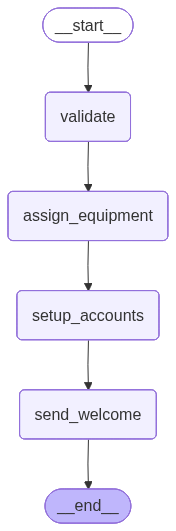

In [7]:
# Visualize the workflow
from IPython.display import Image, display

try:
    display(Image(onboarding_app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Visualization not available: {e}")
    print("But the workflow works perfectly!")

## Part 5: Run the Workflow

In [8]:
# Test the workflow
initial_state = {
    "employee_name": "Karan Singh",
    "employee_id": "106",
    "department": "Engineering",
    "messages": [],
    "validation_status": "",
    "tasks_completed": []
}

print("="*70)
print("STARTING ONBOARDING WORKFLOW")
print("="*70)

result = onboarding_app.invoke(initial_state)

print("\n" + "="*70)
print("ONBOARDING COMPLETE!")
print("="*70)
print(f"\nEmployee: {result['employee_name']}")
print(f"Status: {result['validation_status']}")
print(f"Tasks completed: {len(result['tasks_completed'])}")
print(f"\nAll steps:")
for task in result['tasks_completed']:
    print(f"  ✓ {task}")

STARTING ONBOARDING WORKFLOW
📋 Step 1: Validating employee Karan Singh...
💻 Step 2: Assigning equipment for Engineering department...
🔐 Step 3: Setting up accounts for Karan Singh...
📧 Step 4: Sending welcome email...

ONBOARDING COMPLETE!

Employee: Karan Singh
Status: ✅ Validated
Tasks completed: 3

All steps:
  ✓ Equipment assigned
  ✓ Accounts created
  ✓ Welcome email sent


## 🎯 Exercise 1.1: Add an Orientation Node

Add a new node `schedule_orientation` that:
- Comes after `send_welcome` and before `END`
- Adds "Orientation scheduled" to tasks_completed
- Prints orientation date (e.g., "Orientation scheduled for [next Monday]")

In [ ]:
# Your code here
def schedule_orientation(state: OnboardingState):
    """TODO: Implement this node"""
    pass

# TODO: Create new workflow with the orientation node
# TODO: Test it

## 🎯 Exercise 1.2: Test with Different Departments

Run the workflow for employees in different departments and observe how equipment assignment changes.

In [ ]:
# Test cases
test_employees = [
    {"employee_name": "Pooja Reddy", "employee_id": "107", "department": "HR"},
    {"employee_name": "Vikram Patel", "employee_id": "108", "department": "Sales"},
    {"employee_name": "Neha Kapoor", "employee_id": "109", "department": "Marketing"}
]

# TODO: Run workflow for each employee
for emp in test_employees:
    # Your code here
    pass

---
# Lab 2: Conditional Routing - Smart Leave Approval

**Objective:** Learn conditional edges to route based on state.

**Scenario:** Automatically route leave requests based on duration:
- Short leaves (≤3 days) → Auto-approved
- Long leaves (>3 days) → Manager review
- Insufficient balance → Rejected

**Key Concept:** Conditional edges allow dynamic routing based on state

## Setup - Employee Database

In [11]:
from typing import Literal

# Reuse the employee database from Module 1
employees = {
    "101": {"name": "Priya Sharma", "department": "Engineering", "manager": "102"},
    "102": {"name": "Rahul Verma", "department": "Engineering", "manager": "103"},
    "103": {"name": "Anjali Patel", "department": "HR", "manager": None},
    "104": {"name": "Arjun Reddy", "department": "Sales", "manager": "103"},
    "105": {"name": "Sneha Gupta", "department": "Marketing", "manager": "103"}
}

leave_balances = {
    "101": 12, "102": 8, "103": 15, "104": 10, "105": 5
}

print("✅ Employee database loaded!")

✅ Employee database loaded!


## Part 1: Define State

In [12]:
class LeaveRequestState(TypedDict):
    """State for leave approval workflow"""
    employee_id: str
    employee_name: str
    days_requested: int
    leave_balance: int
    reason: str
    approval_status: str
    messages: Annotated[list, add_messages]
    requires_manager_approval: bool

print("✅ LeaveRequestState defined!")

✅ LeaveRequestState defined!


## Part 2: Create Nodes

In [13]:
def check_leave_balance(state: LeaveRequestState):
    """Node: Check if employee has enough leave"""
    print(f"\n📊 Checking leave balance for {state['employee_name']}...")

    employee_id = state['employee_id']
    balance = leave_balances.get(employee_id, 0)
    days = state['days_requested']

    if days > balance:
        return {
            "leave_balance": balance,
            "approval_status": "❌ Rejected - Insufficient balance",
            "messages": [("assistant", f"Request denied: You have {balance} days, but requested {days} days")]
        }

    return {
        "leave_balance": balance,
        "messages": [("assistant", f"Balance check passed: {balance} days available, {days} days requested")]
    }

def auto_approve(state: LeaveRequestState):
    """Node: Auto-approve short leaves (≤3 days)"""
    print(f"✅ Auto-approving leave for {state['employee_name']}...")

    return {
        "approval_status": "✅ Auto-Approved",
        "messages": [("assistant", f"Leave request for {state['days_requested']} days has been auto-approved!")]
    }

def manager_review(state: LeaveRequestState):
    """Node: Send to manager for approval (>3 days)"""
    print(f"👔 Sending to manager for review...")

    emp_id = state['employee_id']
    manager_id = employees.get(emp_id, {}).get("manager", "Unknown")
    manager_name = employees.get(manager_id, {}).get("name", "Manager")

    return {
        "approval_status": "⏳ Pending Manager Approval",
        "messages": [("assistant", f"Leave request for {state['days_requested']} days sent to {manager_name} for approval")]
    }

def reject_request(state: LeaveRequestState):
    """Node: Reject request due to insufficient balance"""
    print(f"❌ Rejecting leave request...")
    return state  # Status already set in check_leave_balance

print("✅ All nodes defined!")

✅ All nodes defined!


## Part 3: Create Routing Function

**This is the key concept!** A routing function decides which node to go to next based on the state.

In [14]:
def route_after_balance_check(state: LeaveRequestState) -> Literal["approve", "manager", "reject"]:
    """
    Routing function: Decide where to go after balance check

    Returns:
        - "reject" if insufficient balance
        - "approve" if ≤3 days and sufficient balance
        - "manager" if >3 days and sufficient balance
    """

    # Check if balance is insufficient
    if "Rejected" in state.get("approval_status", ""):
        return "reject"

    # Route based on number of days
    if state['days_requested'] <= 3:
        return "approve"
    else:
        return "manager"

print("✅ Routing function defined!")
print("\nRouting logic:")
print("  - Insufficient balance → reject")
print("  - ≤3 days + sufficient → approve")
print("  - >3 days + sufficient → manager")

✅ Routing function defined!

Routing logic:
  - Insufficient balance → reject
  - ≤3 days + sufficient → approve
  - >3 days + sufficient → manager


## Part 4: Build Graph with Conditional Edges

In [15]:
# Create the graph
workflow = StateGraph(LeaveRequestState)

# Add nodes
workflow.add_node("check_balance", check_leave_balance)
workflow.add_node("approve", auto_approve)
workflow.add_node("manager", manager_review)
workflow.add_node("reject", reject_request)

# Add edges
workflow.add_edge(START, "check_balance")

# CONDITIONAL EDGE - This is the magic! 🎯
workflow.add_conditional_edges(
    "check_balance",  # From this node
    route_after_balance_check,  # Use this function to decide
    {
        "approve": "approve",  # If function returns "approve", go to approve node
        "manager": "manager",  # If function returns "manager", go to manager node
        "reject": "reject"  # If function returns "reject", go to reject node
    }
)

# All paths lead to END
workflow.add_edge("approve", END)
workflow.add_edge("manager", END)
workflow.add_edge("reject", END)

# Compile
leave_app = workflow.compile()

print("✅ Leave approval workflow created with conditional routing!")

✅ Leave approval workflow created with conditional routing!


## Part 5: Visualise the Graph

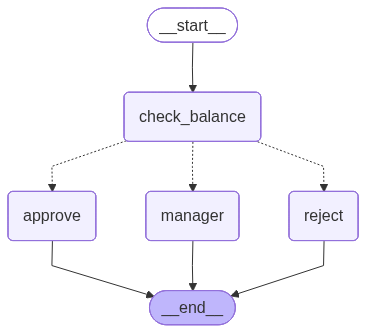

In [17]:
# Visualize the workflow
from IPython.display import Image, display

try:
    display(Image(leave_app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Visualization not available: {e}")
    print("But the workflow works perfectly!")

## Part 5: Test Different Scenarios

In [22]:
def test_leave_request(employee_id, days, reason):
    """Helper function to test leave requests"""
    emp_data = employees.get(employee_id, {})

    initial_state = {
        "employee_id": employee_id,
        "employee_name": emp_data.get("name", "Unknown"),
        "days_requested": days,
        "leave_balance": 0,
        "reason": reason,
        "approval_status": "",
        "messages": [],
        "requires_manager_approval": False
    }

    print("="*70)
    print(f"Leave Request: {emp_data.get('name')} - {days} days - {reason}")
    print("="*70)

    result = leave_app.invoke(initial_state)

    print(f"\n📋 Final Status: {result['approval_status']}")
    print(f"💬 Message: {result['messages'][-1].content}")
    print("="*70)
    print()
    return result

# Test Case 1: Short leave, sufficient balance
print("\n🧪 TEST CASE 1: Short leave (2 days)\n")
test_leave_request("101", 2, "Personal work")

# Test Case 2: Long leave, sufficient balance
print("\n🧪 TEST CASE 2: Long leave (10 days)\n")
test_leave_request("103", 10, "Vacation")

# Test Case 3: Leave exceeding balance
print("\n🧪 TEST CASE 3: Exceeds balance (8 days, only has 5)\n")
test_leave_request("105", 8, "Medical")


🧪 TEST CASE 1: Short leave (2 days)

Leave Request: Priya Sharma - 2 days - Personal work

📊 Checking leave balance for Priya Sharma...
✅ Auto-approving leave for Priya Sharma...

📋 Final Status: ✅ Auto-Approved


TypeError: 'AIMessage' object is not subscriptable

In [23]:
def test_leave_request(employee_id, days, reason):
    """Helper function to test leave requests"""
    emp_data = employees.get(employee_id, {})

    initial_state = {
        "employee_id": employee_id,
        "employee_name": emp_data.get("name", "Unknown"),
        "days_requested": days,
        "leave_balance": 0,
        "reason": reason,
        "approval_status": "",
        "messages": [],
        "requires_manager_approval": False
    }

    print("="*70)
    print(f"Leave Request: {emp_data.get('name')} - {days} days - {reason}")
    print("="*70)

    result = leave_app.invoke(initial_state)

    print(f"\n📋 Final Status: {result['approval_status']}")
    # Fix: Access content attribute of message object
    last_message = result['messages'][-1]
    message_content = last_message.content if hasattr(last_message, 'content') else str(last_message)
    print(f"💬 Message: {message_content}")
    print("="*70)
    print()
    return result

# Test Case 1: Short leave, sufficient balance
print("\n🧪 TEST CASE 1: Short leave (2 days)\n")
test_leave_request("101", 2, "Personal work")

# Test Case 2: Long leave, sufficient balance
print("\n🧪 TEST CASE 2: Long leave (10 days)\n")
test_leave_request("103", 10, "Vacation")

# Test Case 3: Leave exceeding balance
print("\n🧪 TEST CASE 3: Exceeds balance (8 days, only has 5)\n")
test_leave_request("105", 8, "Medical")


🧪 TEST CASE 1: Short leave (2 days)

Leave Request: Priya Sharma - 2 days - Personal work

📊 Checking leave balance for Priya Sharma...
✅ Auto-approving leave for Priya Sharma...

📋 Final Status: ✅ Auto-Approved
💬 Message: Leave request for 2 days has been auto-approved!


🧪 TEST CASE 2: Long leave (10 days)

Leave Request: Anjali Patel - 10 days - Vacation

📊 Checking leave balance for Anjali Patel...
👔 Sending to manager for review...

📋 Final Status: ⏳ Pending Manager Approval
💬 Message: Leave request for 10 days sent to Manager for approval


🧪 TEST CASE 3: Exceeds balance (8 days, only has 5)

Leave Request: Sneha Gupta - 8 days - Medical

📊 Checking leave balance for Sneha Gupta...
❌ Rejecting leave request...

📋 Final Status: ❌ Rejected - Insufficient balance
💬 Message: Request denied: You have 5 days, but requested 8 days



{'employee_id': '105',
 'employee_name': 'Sneha Gupta',
 'days_requested': 8,
 'leave_balance': 5,
 'reason': 'Medical',
 'approval_status': '❌ Rejected - Insufficient balance',
 'messages': [AIMessage(content='Request denied: You have 5 days, but requested 8 days', additional_kwargs={}, response_metadata={}, id='a13a6329-fea3-457d-a781-192fc8019322')],
 'requires_manager_approval': False}

## 🎯 Exercise 2.1: Add an Emergency Leave Path

Add a new route for emergency leaves (indicated by reason containing "emergency"):
- Emergency leaves should be auto-approved regardless of duration
- Add a new node `emergency_approve`
- Update the routing function

In [ ]:
# TODO: Implement emergency leave logic

def emergency_approve(state: LeaveRequestState):
    # Your code here
    pass

def route_with_emergency(state: LeaveRequestState):
    # TODO: Check if reason contains "emergency"
    # TODO: Add emergency routing logic
    pass

## 🎯 Exercise 2.2: Add Maximum Days Limit

Modify the workflow to reject any leave request > 15 days, even if balance is sufficient.

In [ ]:
# TODO: Add this logic to the routing function or create a new node

---
# Lab 3: Parallel Execution - Employee Performance Review

**Objective:** Learn to run multiple nodes in parallel.

**Scenario:** When conducting performance reviews, gather feedback from multiple sources simultaneously:
- Peer reviews
- Manager evaluation
- Self-assessment

All three happen at the same time, then compile into final review.

**Key Concept:** Parallel execution improves speed and efficiency

## Part 1: Define State

In [24]:
class PerformanceReviewState(TypedDict):
    """State for performance review workflow"""
    employee_id: str
    employee_name: str
    review_period: str
    peer_feedback: str
    manager_feedback: str
    self_assessment: str
    final_rating: str
    messages: Annotated[list, add_messages]

print("✅ PerformanceReviewState defined!")

✅ PerformanceReviewState defined!


## Part 2: Create Parallel Nodes

These nodes will run simultaneously:

In [25]:
import time

def gather_peer_feedback(state: PerformanceReviewState):
    """Node: Gather peer reviews"""
    print(f"👥 Gathering peer feedback for {state['employee_name']}...")
    time.sleep(1)  # Simulate processing time

    # Simulate peer feedback
    peer_comments = [
        "Great team player",
        "Always willing to help",
        "Strong technical skills"
    ]

    return {
        "peer_feedback": " | ".join(peer_comments),
        "messages": [("assistant", "Peer feedback collected")]
    }

def gather_manager_feedback(state: PerformanceReviewState):
    """Node: Get manager evaluation"""
    print(f"👔 Gathering manager feedback for {state['employee_name']}...")
    time.sleep(1)  # Simulate processing time

    # Simulate manager feedback
    manager_eval = "Consistently meets expectations. Shows initiative in projects."

    return {
        "manager_feedback": manager_eval,
        "messages": [("assistant", "Manager evaluation received")]
    }

def gather_self_assessment(state: PerformanceReviewState):
    """Node: Get self-assessment"""
    print(f"📝 Gathering self-assessment from {state['employee_name']}...")
    time.sleep(1)  # Simulate processing time

    # Simulate self-assessment
    self_eval = "Achieved all quarterly goals. Completed 3 major projects."

    return {
        "self_assessment": self_eval,
        "messages": [("assistant", "Self-assessment submitted")]
    }

def compile_review(state: PerformanceReviewState):
    """Node: Compile all feedback and generate final rating"""
    print(f"📊 Compiling performance review...")

    # Use LLM to generate final review
    review_prompt = f"""Based on the following feedback for {state['employee_name']}, provide a brief performance summary and rating (1-5):

Peer Feedback: {state['peer_feedback']}
Manager Feedback: {state['manager_feedback']}
Self Assessment: {state['self_assessment']}

Provide:
1. Brief summary (2-3 sentences)
2. Rating (1-5, where 5 is excellent)
"""

    response = llm.invoke(review_prompt)

    return {
        "final_rating": response.content,
        "messages": [("assistant", "Performance review completed")]
    }

print("✅ All nodes defined!")

✅ All nodes defined!


## Part 3: Build Graph with Parallel Execution

In [26]:
# Create the graph
workflow = StateGraph(PerformanceReviewState)

# Add all nodes
workflow.add_node("peer_feedback", gather_peer_feedback)
workflow.add_node("manager_feedback", gather_manager_feedback)
workflow.add_node("self_assessment", gather_self_assessment)
workflow.add_node("compile", compile_review)

# Parallel execution: START connects to THREE nodes simultaneously
workflow.add_edge(START, "peer_feedback")
workflow.add_edge(START, "manager_feedback")
workflow.add_edge(START, "self_assessment")

# All three feed into compile
workflow.add_edge("peer_feedback", "compile")
workflow.add_edge("manager_feedback", "compile")
workflow.add_edge("self_assessment", "compile")

# Compile leads to END
workflow.add_edge("compile", END)

# Compile the graph
review_app = workflow.compile()

print("✅ Performance review workflow created with parallel execution!")
print("\nWorkflow Structure:")
print("                    ┌─→ peer_feedback ────┐")
print("       START ───────┼─→ manager_feedback ─┼─→ compile ──→ END")
print("                    └─→ self_assessment ───┘")

✅ Performance review workflow created with parallel execution!

Workflow Structure:
                    ┌─→ peer_feedback ────┐
       START ───────┼─→ manager_feedback ─┼─→ compile ──→ END
                    └─→ self_assessment ───┘


## Part 4: Run Parallel Workflow

In [27]:
initial_state = {
    "employee_id": "101",
    "employee_name": "Priya Sharma",
    "review_period": "Q4 2024",
    "peer_feedback": "",
    "manager_feedback": "",
    "self_assessment": "",
    "final_rating": "",
    "messages": []
}

print("="*70)
print("STARTING PERFORMANCE REVIEW")
print("="*70)
print("Note: Peer, manager, and self-assessment are gathered in parallel!")
print()

start_time = time.time()
result = review_app.invoke(initial_state)
end_time = time.time()

print("\n" + "="*70)
print("REVIEW COMPLETE!")
print("="*70)
print(f"\nEmployee: {result['employee_name']}")
print(f"Period: {result['review_period']}")
print(f"\n📊 Final Review:")
print(result['final_rating'])
print(f"\n⏱️  Processing time: {end_time - start_time:.2f} seconds")
print("Note: With parallel execution, all three feedback sources were gathered simultaneously!")

STARTING PERFORMANCE REVIEW
Note: Peer, manager, and self-assessment are gathered in parallel!

👔 Gathering manager feedback for Priya Sharma...
👥 Gathering peer feedback for Priya Sharma...
📝 Gathering self-assessment from Priya Sharma...
📊 Compiling performance review...

REVIEW COMPLETE!

Employee: Priya Sharma
Period: Q4 2024

📊 Final Review:
**Performance Summary:**  
Priya Sharma is a valuable team member who consistently demonstrates strong technical skills and a collaborative spirit. She has successfully achieved all her quarterly goals and completed three major projects, showcasing her initiative and commitment to excellence in her work.

**Rating:** 5

⏱️  Processing time: 3.18 seconds
Note: With parallel execution, all three feedback sources were gathered simultaneously!


## 🎯 Exercise 3.1: Add Skills Assessment

Add a fourth parallel node that assesses technical/professional skills.

In [ ]:
# TODO: Implement skills assessment node
# TODO: Update state TypedDict to include skills_score
# TODO: Add node to workflow
# TODO: Connect to compile node

---
# Lab 4: Understanding create_agent()

**Objective:** Understand how LangChain's `create_agent()` uses LangGraph under the hood.

**Key Insight:** The `create_agent()` function you used in Module 1 is actually creating a LangGraph workflow similar to what we've been building!

## Comparing Approaches

### Approach 1: LangChain's create_agent() (Module 1)

```python
from langchain.agents import create_agent
from langgraph.checkpoint.memory import InMemorySaver

# High-level: LangChain does all the work
agent = create_agent(
    model="openai:gpt-4o-mini",
    tools=[get_employee_info, check_leave_balance],
    prompt="You are an HR assistant.",
    checkpointer=InMemorySaver()
)

# Simple to use!
result = agent.invoke(
    {"messages": [{"role": "user", "content": "Who is employee 101?"}]},
    config={"configurable": {"thread_id": "1"}}
)
```

### Approach 2: Raw LangGraph (What we've been learning)

See the next cells for the implementation.

## Setup: Define Tools (from Module 1)

In [29]:
from langchain.tools import tool

@tool
def get_employee_info(employee_id: str) -> str:
    """Get employee information by ID"""
    employees_data = {
        "101": "Priya Sharma - Engineering - Senior Developer",
        "102": "Rahul Verma - Engineering - Manager",
        "103": "Anjali Patel - HR - Director"
    }
    return employees_data.get(employee_id, f"Employee {employee_id} not found")

@tool
def check_leave_balance(employee_id: str) -> str:
    """Check remaining leave days for an employee"""
    leave_data = {
        "101": "Priya Sharma has 12 days of leave remaining",
        "102": "Rahul Verma has 8 days of leave remaining",
        "103": "Anjali Patel has 15 days of leave remaining"
    }
    return leave_data.get(employee_id, f"Leave data for employee {employee_id} not found")

print("✅ Tools defined!")

✅ Tools defined!


## Building Agent Manually with LangGraph

In [30]:
from langgraph.prebuilt import ToolNode
from langgraph.checkpoint.memory import InMemorySaver

# Define agent state
class AgentState(TypedDict):
    messages: Annotated[list, add_messages]

# Create the agent node
def agent_node(state: AgentState):
    """The LLM agent that decides what to do"""
    llm_with_tools = llm.bind_tools([get_employee_info, check_leave_balance])
    response = llm_with_tools.invoke(state['messages'])
    return {"messages": [response]}

# Create routing function
def should_continue(state: AgentState) -> Literal["tools", "end"]:
    """Router: decide if we need to call tools or finish"""
    last_message = state['messages'][-1]
    if hasattr(last_message, 'tool_calls') and last_message.tool_calls:
        return "tools"
    return "end"

# Build the graph
workflow = StateGraph(AgentState)
workflow.add_node("agent", agent_node)
workflow.add_node("tools", ToolNode([get_employee_info, check_leave_balance]))

workflow.add_edge(START, "agent")
workflow.add_conditional_edges(
    "agent",
    should_continue,
    {"tools": "tools", "end": END}
)
workflow.add_edge("tools", "agent")  # After tools, go back to agent

manual_agent = workflow.compile(checkpointer=InMemorySaver())

print("✅ Manual agent created using LangGraph!")
print("\nThis is essentially what create_agent() does internally!")

✅ Manual agent created using LangGraph!

This is essentially what create_agent() does internally!


/tmp/ipython-input-1638996788.py:26: LangGraphDeprecatedSinceV10: ToolNode has been moved to langchain.agents.tool_node. Please update your import to 'from langchain.agents.tool_node import ToolNode'. Deprecated in LangGraph V1.0 to be removed in V2.0.
  workflow.add_node("tools", ToolNode([get_employee_info, check_leave_balance]))


## Test the Manual Agent

In [31]:
# Test it - works just like create_agent()!
config = {"configurable": {"thread_id": "manual_test"}}

result = manual_agent.invoke(
    {"messages": [("user", "Who is employee 101?")]},
    config
)

print("Question: Who is employee 101?")
print(f"\nResponse: {result['messages'][-1].content}")

# Follow-up with memory
result = manual_agent.invoke(
    {"messages": [("user", "What's their leave balance?")]},
    config
)

print("\n\nFollow-up: What's their leave balance?")
print(f"\nResponse: {result['messages'][-1].content}")
print("\n✅ Agent remembers context from previous question!")

Question: Who is employee 101?

Response: Employee 101 is Priya Sharma, who works in the Engineering department as a Senior Developer.


Follow-up: What's their leave balance?

Response: Priya Sharma has 12 days of leave remaining.

✅ Agent remembers context from previous question!


## When to Use Each Approach?

| Scenario | Use | Reason |
|----------|-----|--------|
| **Quick prototyping** | `create_agent()` | Fast, less code |
| **Standard agent patterns** | `create_agent()` | Built-in best practices |
| **Custom workflow logic** | Raw LangGraph | Full control |
| **Complex routing** | Raw LangGraph | Custom conditional logic |
| **Non-standard patterns** | Raw LangGraph | Not available in high-level API |
| **Learning/Understanding** | Raw LangGraph | See how it works |
| **Production apps** | Either | Depends on complexity |

## 🎯 Exercise 4.1: Build Your Own create_agent()

Create a simplified version of `create_agent()` using LangGraph.

In [ ]:
def my_create_agent(llm, tools, system_prompt, use_memory=True):
    """
    Simplified version of create_agent() using LangGraph

    Args:
        llm: Language model
        tools: List of tool functions
        system_prompt: System instructions
        use_memory: Whether to use checkpointer

    Returns:
        Compiled LangGraph application
    """

    # TODO: Define AgentState
    # TODO: Create agent_node with system prompt
    # TODO: Create routing function
    # TODO: Build graph with nodes and edges
    # TODO: Compile with optional checkpointer

    pass

# Test it
# my_agent = my_create_agent(
#     llm=ChatOpenAI(model="gpt-4o-mini"),
#     tools=[get_employee_info, check_leave_balance],
#     system_prompt="You are an HR assistant",
#     use_memory=True
# )

---
# Summary: LangGraph → LangChain Journey

## What You've Learned:

1. **Lab 1**: Core concepts - State, Nodes, Edges, START, END
2. **Lab 2**: Conditional routing - Dynamic workflow decisions
3. **Lab 3**: Parallel execution - Multiple tasks simultaneously
4. **Lab 4**: Understanding `create_agent()` - How high-level abstractions work

## The Journey:

```
Module 1 (LangChain) → Module 2 (LangGraph) → Back to LangChain (with understanding!)

   create_agent()   →   Learn what's inside   →   Use wisely with full knowledge
   "Just works"     →   "I know how it works"  →   "I can customize when needed"
```

## When to Use What:

- **Use LangChain's create_agent()** for 80% of cases - it's fast and reliable
- **Use Raw LangGraph** when you need:
  - Custom workflow patterns
  - Special routing logic
  - Fine-grained control
  - To learn and understand deeply

## Next Steps:

- Module 3: Advanced agent patterns
- Module 4: Multi-agent systems
- Module 5: Production deployment

---
# Bonus: LangGraph Cheat Sheet

## Common LangGraph Patterns

### 1. Linear Flow
```python
workflow.add_edge(START, "step1")
workflow.add_edge("step1", "step2")
workflow.add_edge("step2", END)
```

### 2. Conditional Branch
```python
workflow.add_conditional_edges(
    "decision_node",
    routing_function,
    {"option_a": "node_a", "option_b": "node_b"}
)
```

### 3. Parallel Execution
```python
workflow.add_edge(START, "parallel_1")
workflow.add_edge(START, "parallel_2")
workflow.add_edge("parallel_1", "join")
workflow.add_edge("parallel_2", "join")
```

### 4. Loop
```python
workflow.add_conditional_edges(
    "check_node",
    lambda s: "continue" if s['count'] < 5 else "end",
    {"continue": "process_node", "end": END}
)
workflow.add_edge("process_node", "check_node")  # Loop back
```

## State Management Tips

```python
# Good: Use TypedDict for clarity
class MyState(TypedDict):
    counter: int
    messages: Annotated[list, add_messages]  # Append messages
    data: dict  # Replace data

# Update state in nodes
def my_node(state: MyState):
    return {
        "counter": state['counter'] + 1,  # Update
        "messages": [("assistant", "New message")]  # Append
    }
```

---
# 🎉 Congratulations!

You now understand both the high-level and low-level approaches to building agents with LangChain and LangGraph!

**Keep practicing and building!** 🚀